# Risk Management - Problem Set 03
Authors:
- Dawid Włosek
- Julia Zezula

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.integrate import quad

## Problem 01

In [2]:
#  Compute Value at Risk (VaR) at confidence level alpha for a standard normal distribution.
def compute_var(alpha: float) -> float:
    return -norm.ppf(alpha)


In [3]:
# Compute Expected Shortfall (ES) using the PDF-based integral definition.
def compute_es_pdf(alpha: float, var_alpha: float) -> float:
    def integrand(x):
        return x * norm.pdf(x)
    
    integral, _ = quad(integrand, -np.inf, -var_alpha)
    return -integral / alpha

In [4]:
# Compute Expected Shortfall (ES) using the quantile-based integral definition.
def compute_es_var(alpha: float) -> float:
    def integrand(gamma):
        return -norm.ppf(gamma)
    
    integral, _ = quad(integrand, 0, alpha)
    return integral / alpha

In [8]:
alpha = 0.05
var_alpha = compute_var(alpha)
es_pdf = compute_es_pdf(alpha, var_alpha)
es_var = compute_es_var(alpha)

print(f"ES - PDF integral definition: {es_pdf:.5f}")
print(f"ES - Quantile integral definition: {es_var:.5f}")
print(f"Difference between those two: {abs(es_pdf - es_var):.5e}")

ES - PDF integral definition: 2.06271
ES - Quantile integral definition: 2.06271
Difference between those two: 1.05755e-11


## Problem 02

In [21]:
#VaR for exponential distribution with λ=1
def var_exponential(alpha: np.ndarray) -> np.ndarray:
    return -np.log(alpha)

In [22]:
# ES for exponential distribution with λ=1.
def es_exponential(alpha: np.ndarray) -> np.ndarray:
    """ES for exponential distribution with λ=1."""
    return (1 - alpha * np.log(alpha) - alpha) / alpha

In [23]:
# VaR for standard normal distribution.
def var_normal(alpha: np.ndarray) -> np.ndarray:
    return -norm.ppf(alpha)

In [24]:
# ES for standard normal distribution using the quantile integral definition.
def es_normal(alpha: float) -> float:
    integrand = lambda gamma: -norm.ppf(gamma)
    integral, _ = quad(integrand, 0, alpha)
    return integral / alpha

In [25]:
# Vectorized ES computation for an array of alphas (standard normal)
def compute_es_normal_array(alphas: np.ndarray) -> np.ndarray:
    """Vectorized ES computation for an array of alphas (standard normal)."""
    return np.array([es_normal(a) for a in alphas])

In [38]:
def plot_var(alphas, VaR_exp, VaR_norm):
    plt.figure(figsize=(6, 4))
    plt.plot(alphas, VaR_exp, label='Exponential', color="pink")
    plt.plot(alphas, VaR_norm, label='Normal', color='blue')
    plt.xlabel(r'$\alpha$')
    plt.ylabel(r'$VaR_\alpha$')
    plt.title('VaR')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [37]:
def plot_es(alphas, ES_exp, ES_norm):
    plt.figure(figsize=(6, 4))
    plt.plot(alphas, ES_exp, label='Exponential', color='pink')
    plt.plot(alphas, ES_norm, label='Normal', color='blue')
    plt.xlabel(r'$\alpha$')
    plt.ylabel(r'$ES_\alpha$')
    plt.title('ES')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [39]:
alphas = np.linspace(0.001, 0.2, 200)

# Compute values
VaR_exp = var_exponential(alphas)
ES_exp = es_exponential(alphas)
VaR_norm = var_normal(alphas)
ES_norm = compute_es_normal_array(alphas)

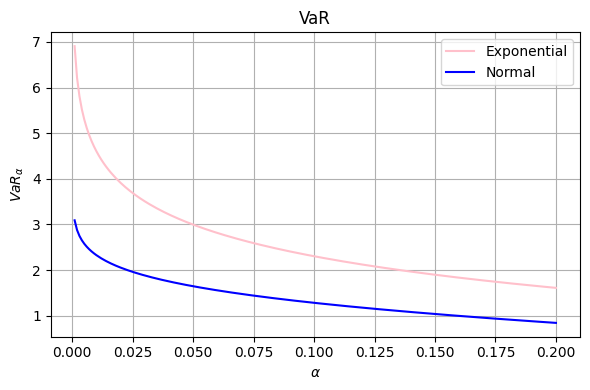

In [41]:
plot_var(alphas, VaR_exp, VaR_norm)

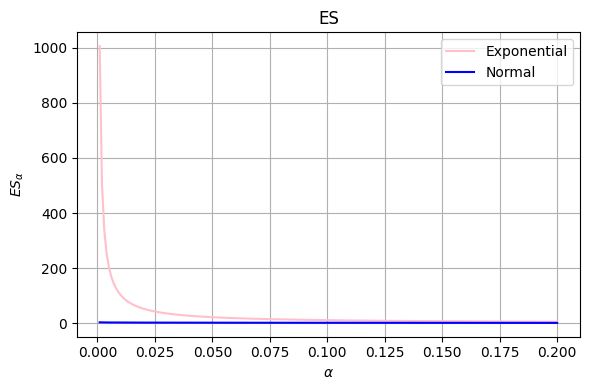

In [42]:
plot_es(alphas, ES_exp, ES_norm)

In [43]:
# Print a few values for debugging
for a in [0.01, 0.05, 0.07, 0.1, 0.11]:
    print(f"Expected shortfall normal({a}) : {es_normal(a):.4f}")

Expected shortfall normal(0.01) : 2.6652
Expected shortfall normal(0.05) : 2.0627
Expected shortfall normal(0.07) : 1.9181
Expected shortfall normal(0.1) : 1.7550
Expected shortfall normal(0.11) : 1.7094
